# Cell Identity and Percent Composition Figures for Publishing

### 1. Import Required Packages 
### 2. Import Prior Data 
### 3. UMAP For Publishing
### 4. Violin Plots for Publishing showing how each cell cluster was annotated
### 5. Count Each Cell Type Across Timepoints and Doses


## <br> 1. Import Required Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import scvi
import anndata as ad
import seaborn as sns

from scvi.model.utils import mde
from scipy import sparse
from anndata import AnnData
from anndata.experimental.multi_files import AnnCollection

[rank: 0] Global seed set to 0


Set figure parameters.

In [2]:
sc.set_figure_params(figsize=(6,6))
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'
pd.options.display.max_colwidth = 200
#plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['pdf.fonttype'] = 'truetype'

## <br> 2. Import Prior Clustered Data

In [3]:
adata =  ad.read_h5ad('../01_Libraries_Integration_and_Analysis---scVI/Adata_Objects/01f_AllGenes_Clustered_And_Annotated_Cells.h5ad')


In [4]:
print(adata.raw)

Raw AnnData with n_obs × n_vars = 263070 × 22917


In [5]:
print(adata) 

AnnData object with n_obs × n_vars = 263070 × 22917
    obs: 'Dose', 'Time', 'OrigIdent', 'Celltype', 'Cell_Subtype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'Barcode', 'OrigIdent-Barcode', 'Seurat_Celltype', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'leiden_scVI_res_0.05', 'leiden_scVI_res_0.1', 'leiden_scVI_res_0.25', 'leiden_scVI_res_0.5', 'leiden_scVI_res_0.75', 'leiden_scVI_res_1.50', 'OrigIdent_Celltype', 'Dose_Time'
    uns: 'Cell_Subtype_colors', 'Celltype_Wilcoxon', 'Celltype_colors', 'Dose_colors', 'OrigIdent_colors', 'Time_colors', 'doublet_info_colors', 'leiden', 'leiden_scVI_res_0.25_colors', 'leiden_scVI_res_0.5_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts', 'log1p_counts'
    obsp: 'connectivities', 'distances'


## <br> 3. UMAP For Publishing

In [6]:
palette = sns.color_palette("hls", 10)

In [7]:
print(palette.as_hex())

['#db5f57', '#dbae57', '#b9db57', '#69db57', '#57db94', '#57d3db', '#5784db', '#7957db', '#c957db', '#db579e']


/mnt/home/cholicog/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


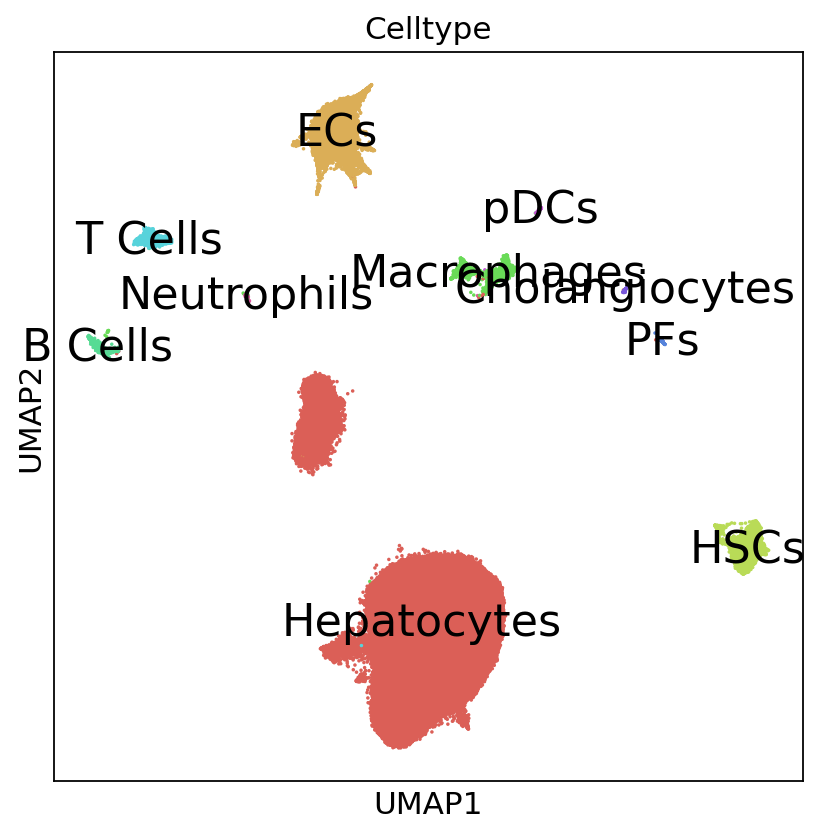

In [8]:
sc.pl.umap(
    adata,
    color=["Celltype"],
    legend_loc="on data",
    legend_fontsize=20,
    legend_fontweight='normal',
    frameon=True,
    size=10,
    palette = sns.color_palette("hls", 10),
    save='Annotated_Cells_For_Publishing.pdf'
)

## <br> 4. Violin Plots for Publishing showing how each cell cluster was annotated

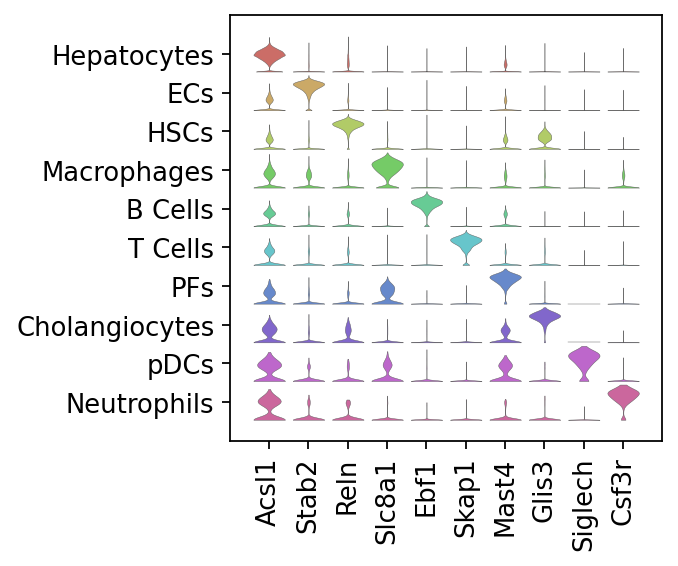

In [9]:
markers = ['Acsl1', 'Stab2', 'Reln', 'Slc8a1', 'Ebf1', 
           'Skap1', 'Mast4', 'Glis3', 'Siglech', 'Csf3r' 
           ]


sc.pl.stacked_violin(adata, 
                     markers, 
                     groupby='Celltype', 
                     row_palette=sns.color_palette("hls", 10),
                     save='Annotated_Cells_For_Publishing.pdf'
                    )

## <br> 5. Count Each Cell Type Across Timepoints and Doses

In [10]:
adata.obs['Celltype'].value_counts()

Hepatocytes       212178
ECs                25123
HSCs                9408
Macrophages         6105
B Cells             4262
T Cells             4133
PFs                  722
Cholangiocytes       546
pDCs                 297
Neutrophils          296
Name: Celltype, dtype: int64

In [11]:
meta_data = adata.obs[['OrigIdent','Dose','Time']].drop_duplicates(keep='first')
cell_data = adata.obs[['OrigIdent','Celltype']]

# Group by "OrigIdent" and "Cell_Subtype" and count the occurrences
grouped = cell_data.groupby(["OrigIdent", "Celltype"]).size().reset_index(name="count")

# Pivot the table
pivot_table = pd.pivot_table(grouped, values='count', index='OrigIdent', columns='Celltype', fill_value=0)

# Display the pivot table
pivot_table

Celltype,Hepatocytes,ECs,HSCs,Macrophages,B Cells,T Cells,PFs,Cholangiocytes,pDCs,Neutrophils
OrigIdent,,,,,,,,,,
L001,4082,334,119,59,30,47,11,4,2,2
L002,4607,746,125,197,83,101,16,14,6,6
L003,4479,845,191,214,56,74,10,14,6,8
L016,3401,490,208,72,38,65,7,7,6,4
L018,3366,481,123,147,44,62,9,5,2,10
L019,5256,1010,169,298,69,151,10,11,13,14
L021,3773,411,190,53,43,53,10,13,3,3
L022,9921,577,326,149,129,100,36,20,1,3
L023,5811,958,255,285,190,145,16,18,11,4


In [12]:
pivot_table.to_csv('./Markers_Data/02a_CellCounts_Split_by_Dose_and_Time.txt', sep='\t')
meta_data.to_csv('./Markers_Data/02a_MetaData_Split_by_Dose_and_Time.txt', sep='\t', index=None)